In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.svm import SVC


import warnings
warnings.filterwarnings('ignore')



In [46]:
df = pd.read_csv(r"C:\Users\asus\Downloads\Tesla.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [10]:
df.shape

(5044, 7)

In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03
mean,355.694192,361.667120,348.873125,354.977317,291.845671,6.550670e+06
std,189.887843,192.819066,186.200385,189.390127,171.063463,5.057025e+06
min,37.055698,39.133099,37.055698,37.757500,20.092848,0.000000e+00
25%,222.223499,226.442997,217.319000,222.145000,157.189774,3.292158e+06
50%,362.000000,368.542511,356.329498,362.135010,302.699951,5.218132e+06
75%,483.989990,491.349754,475.830490,484.137245,422.681190,8.113444e+06
max,895.286987,911.768982,884.997009,891.190002,714.714783,5.204627e+07


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


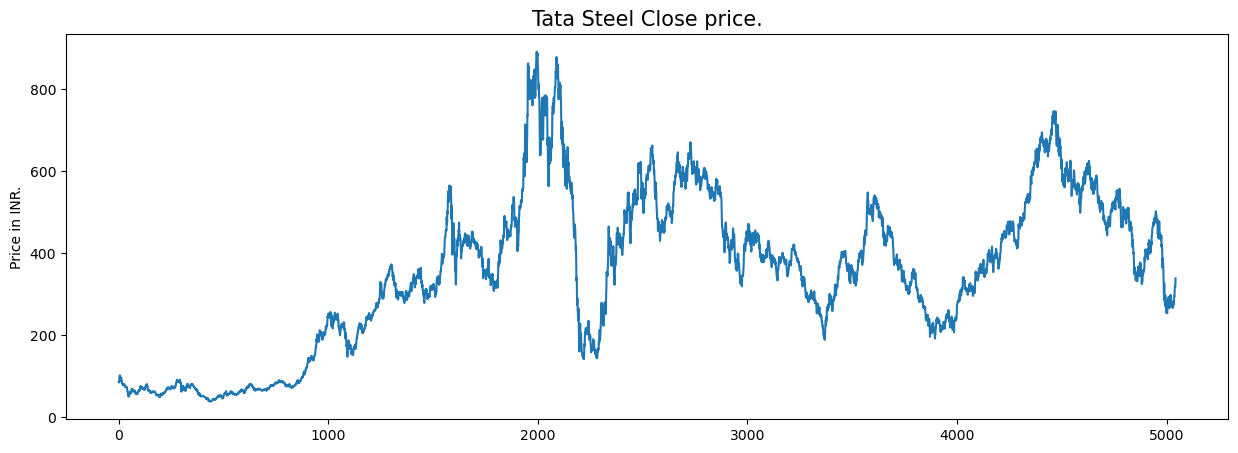

In [35]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tata Steel Close price.', fontsize=15)
plt.ylabel('Price in INR.')
plt.show()

In [21]:
df[df['Close'] == df['Adj Close']].shape

(224, 7)

In [22]:
df = df.drop(['Adj Close'], axis=1)

In [23]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

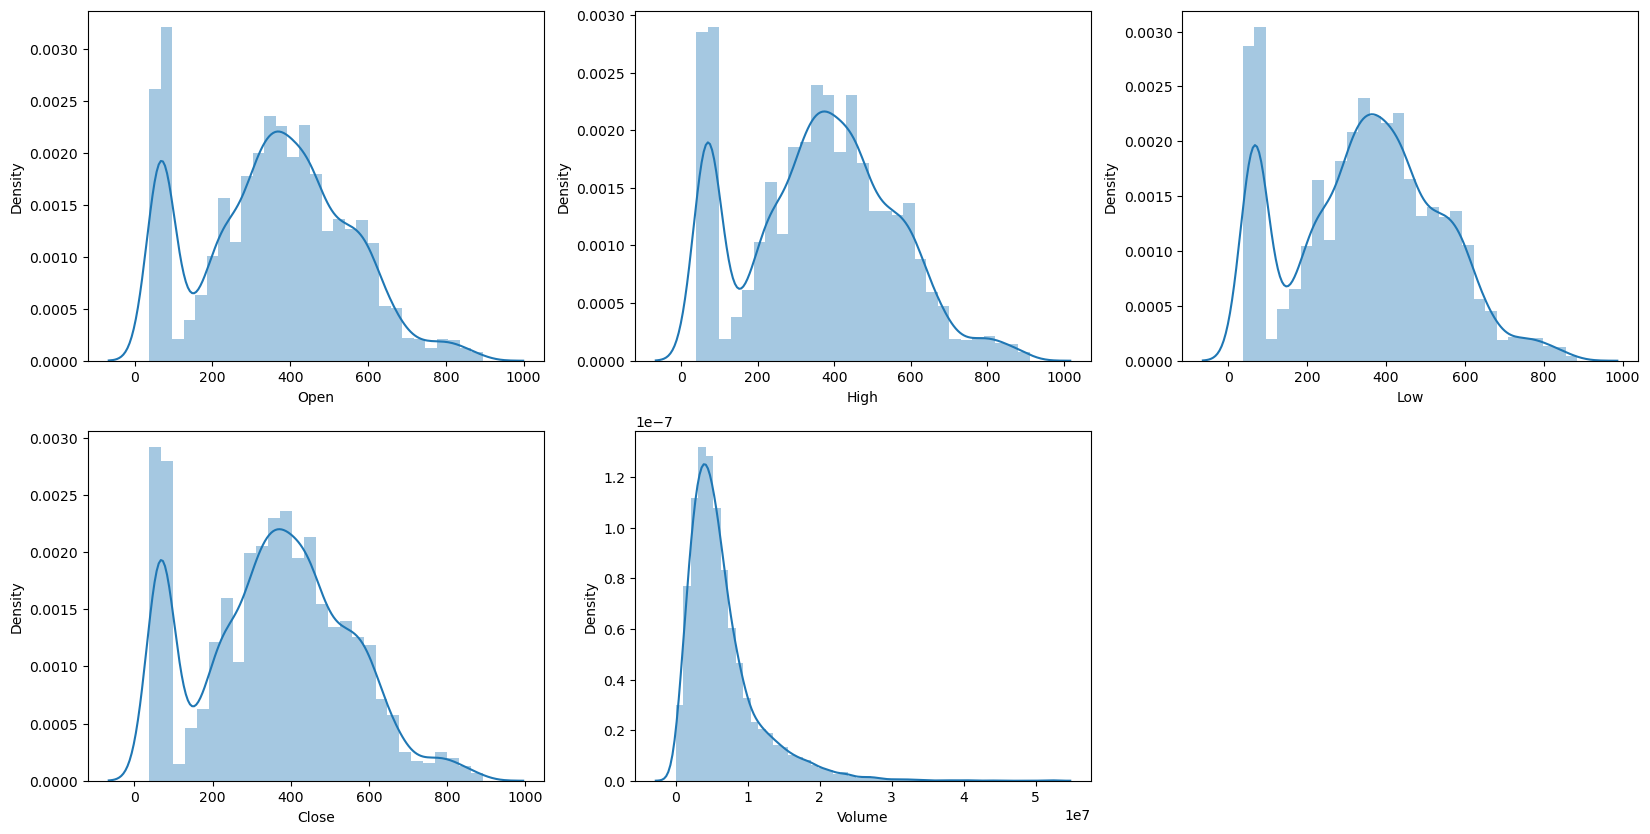

In [24]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

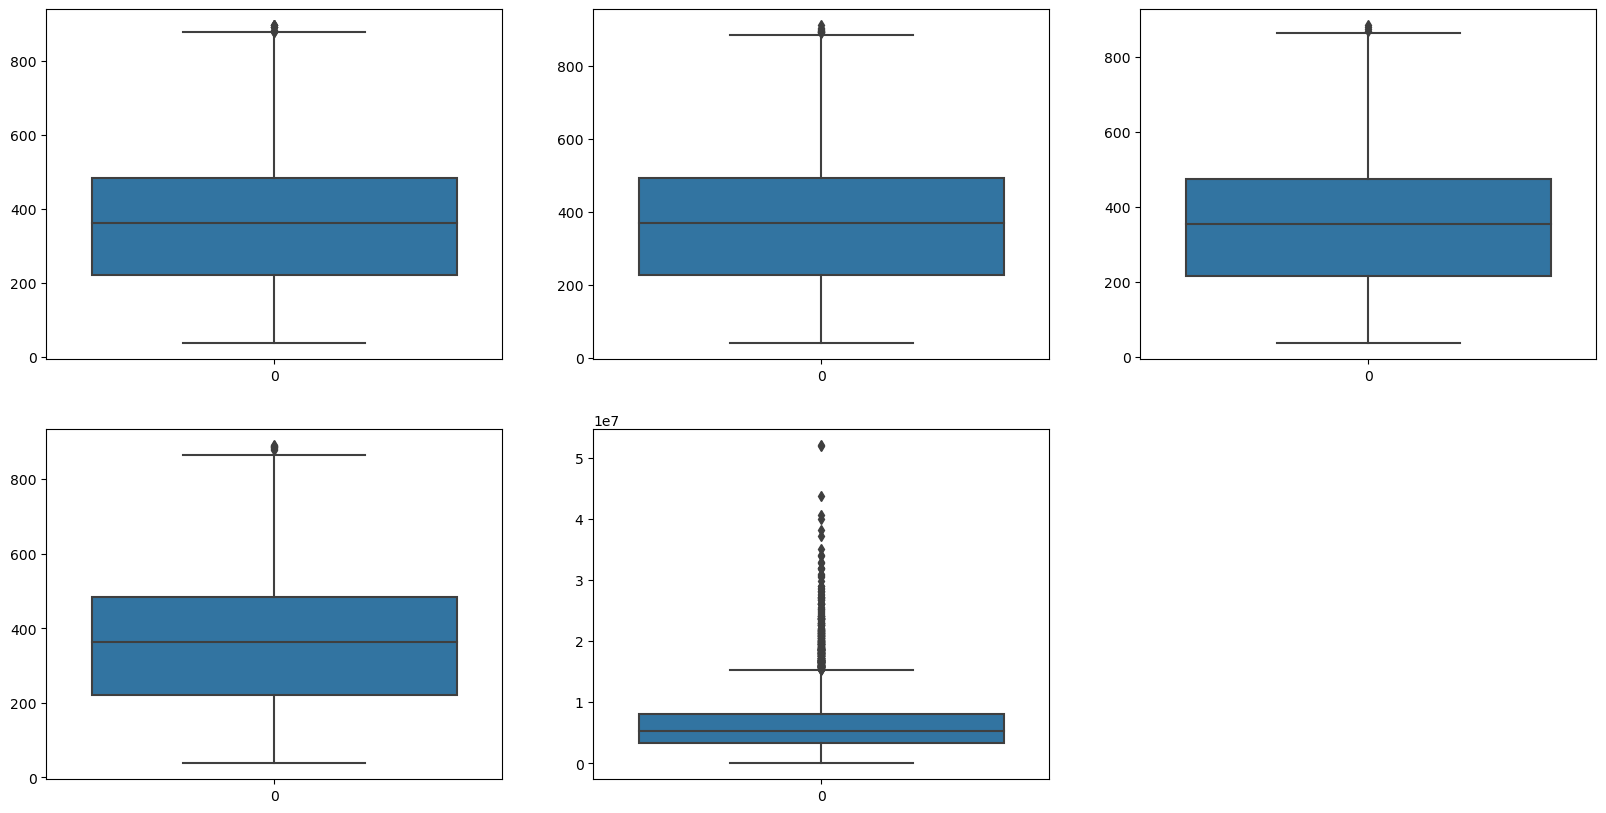

In [25]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [47]:
splitted = df['Date'].str.split('/', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,day,month,year
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,29,6,2010
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,30,6,2010
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999,1,7,2010
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001,2,7,2010
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001,6,7,2010


In [42]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,day,month,year,is_quarter_end
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,29,6,2010,1
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,30,6,2010,1
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999,1,7,2010,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001,2,7,2010,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001,6,7,2010,0


In [3]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

NameError: name 'df' is not defined

In [2]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.drop('Date', axis=1).groupby('is_quarter_end').mean()

NameError: name 'np' is not defined

In [53]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

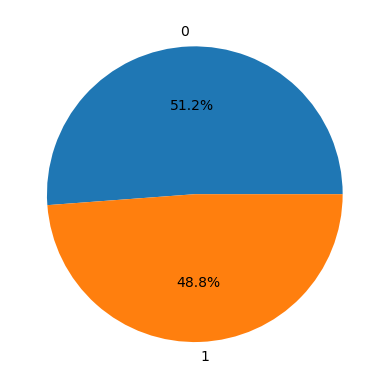

In [54]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

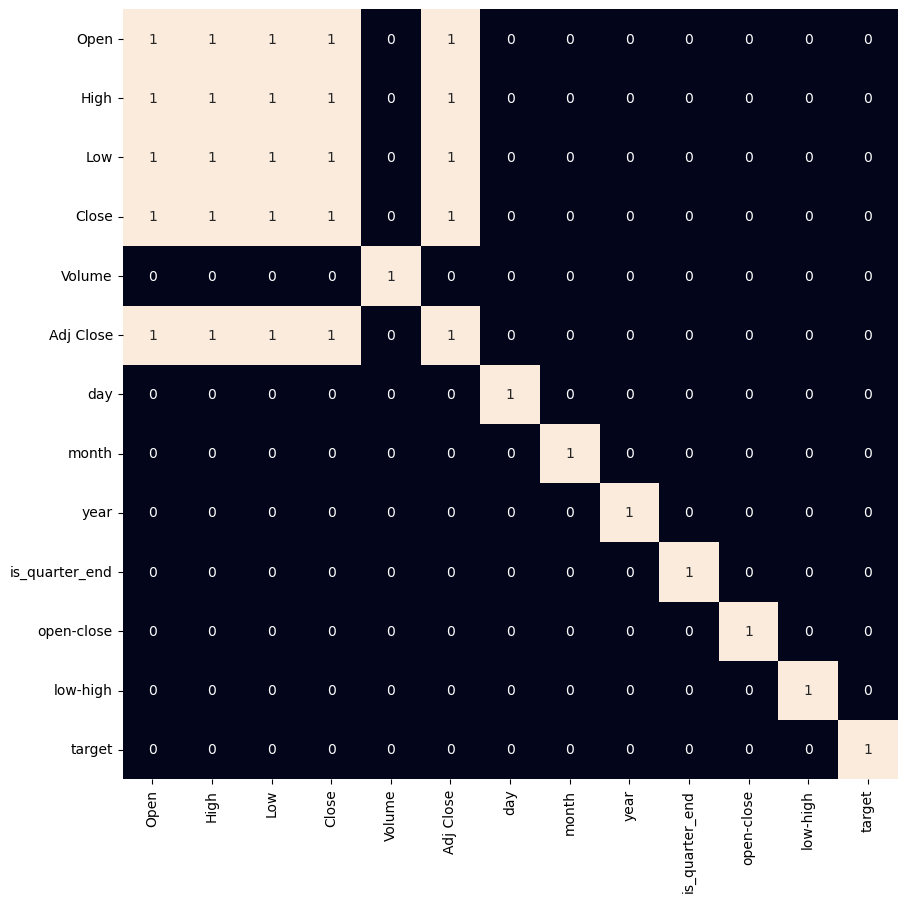

In [55]:
plt.figure(figsize=(10, 10))  
sb.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

In [56]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(1522, 3) (170, 3)


In [66]:


models = [LogisticRegression(), SVC(
  kernel='poly', probability=True),]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()


LogisticRegression() : 
Training Accuracy :  0.5191709844559586
Validation Accuracy :  0.5435330347144457

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.47205958549222793
Validation Accuracy :  0.44750839865621495



IndexError: list index out of range

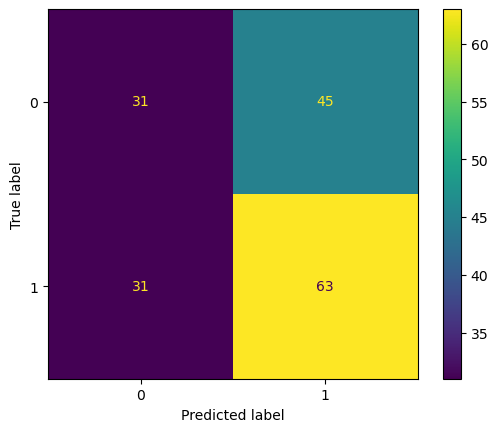

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()